# Experiments

In [1]:
from prayas import *

Experiments provide a simple way to continuously monitor the experiment performance and to decide when to stop based on the maximum potential loss of the variants. We first set up the experiment by defining the model, baseline, and measures of interest:

In [2]:
e = Experiment("moonshot1")

e.setup = OneOptionModel(["apollo", "gemini"], baseline="apollo")
e.setup.add_measure("revenue", [90, 80])
e.setup.primary_measure = "revenue"

The specification of the experiment is:

In [3]:
print(e)

Experiment with a One option model
Variants              : apollo, gemini
Baseline              : apollo
Measures              : conversion, revenue
Primary measure       : revenue
Maximum loss threshold: 0.05            


Then we add the first daily data we collected:

In [4]:
e.add_data("20190730", [ 0,  0], [ 186,  180])
e.add_data("20190731", [ 7,  1], [ 714,  652])

We can compute the daily scoring against the baseline:

In [5]:
e.monitor_score_baseline()

,Date,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,20190730,apollo,revenue,0.52115,0.00000,0.000000,0.000000,8.907531,47.605960
1,20190730,gemini,conversion,0.51015,0.51165,2.520760,48.816944,1.745930,49.233941
2,20190730,apollo,conversion,0.48985,0.00000,0.000000,0.000000,-1.715971,51.024891
3,20190730,gemini,revenue,0.47885,0.47550,-8.954422,51.797862,-8.178985,52.407787
4,20190731,apollo,revenue,0.98170,0.00000,0.000000,0.000000,316.529777,1.074573
5,20190731,apollo,conversion,0.97175,0.00000,0.000000,0.000000,267.747155,1.518069
6,20190731,gemini,conversion,0.02825,0.02625,-72.482875,72.989301,-72.807404,73.056595
7,20190731,gemini,revenue,0.01830,0.01840,-75.806290,75.939597,-75.992113,75.990584


To easily compare the performance of the variants over time, we suggest to look at the maximum potential loss per variant:

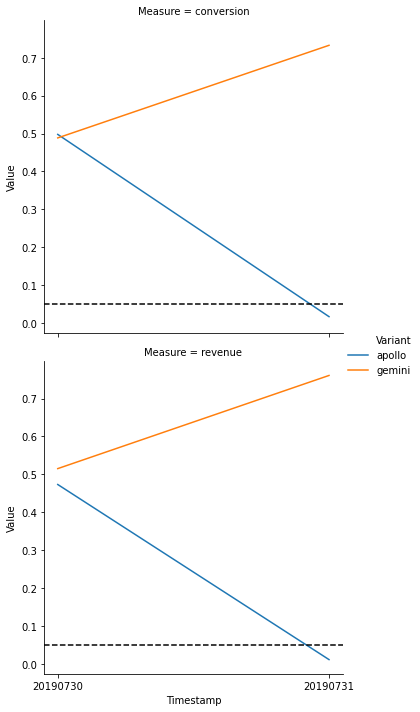

In [6]:
e.monitor_plot()

The plot shows the maximum potential loss over time; the dashed line is the maximum loss threshold set for the experiment (default: 0.05).

As the experiment continues, we add more daily data:

In [7]:
e.add_data("20190730", [ 0,  0], [ 186,  180])
e.add_data("20190731", [ 7,  1], [ 714,  652])
e.add_data("20190801", [13,  5], [1233, 1141])
e.add_data("20190802", [15,  8], [1744, 1681])
e.add_data("20190803", [21, 13], [2304, 2146])
e.add_data("20190804", [26, 16], [2835, 2719])
e.add_data("20190805", [29, 20], [3275, 3260])
e.add_data("20190806", [36, 23], [3741, 3805])
e.add_data("20190807", [43, 26], [4343, 4354])
e.add_data("20190808", [51, 32], [4863, 4921])

And we continue to investigate the result:

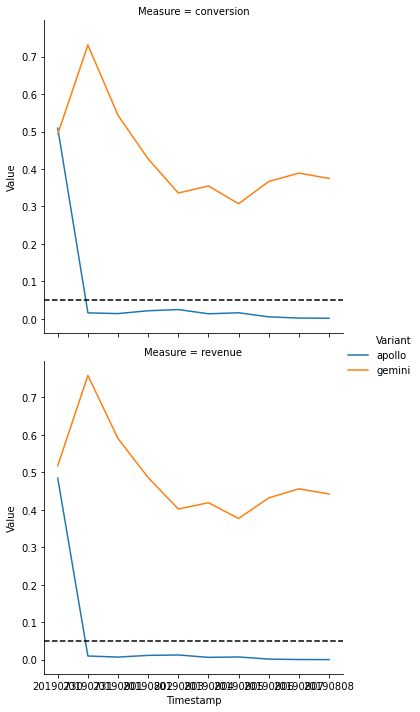

In [8]:
e.monitor_plot()

In this example, the loss of the 'apollo' variant is below the threshold after a few days and continues to stay below. We decide to stop an experiment with a result if a variant is below the threshold for a consecutive number of days:

In [9]:
e.monitor_decision(days=5)

,Timestamp,Loss apollo,Loss gemini,Runs apollo,Runs gemini,Max loss apollo,Max loss gemini,Stop apollo,Stop gemini
0,20190730,0.480882,0.521753,NaN,NaN,NaN,NaN,False,False
1,20190731,0.009375,0.759418,NaN,NaN,NaN,NaN,False,False
2,20190801,0.007157,0.592048,NaN,NaN,NaN,NaN,False,False
3,20190802,0.012995,0.487835,NaN,NaN,NaN,NaN,False,False
4,20190803,0.013089,0.402300,4.0,0.0,0.480882,0.759418,False,False
5,20190804,0.006073,0.419414,5.0,0.0,0.013089,0.759418,True,False
6,20190805,0.007073,0.379493,5.0,0.0,0.013089,0.592048,True,False
7,20190806,0.001480,0.434431,5.0,0.0,0.013089,0.487835,True,False
8,20190807,0.000552,0.455927,5.0,0.0,0.013089,0.455927,True,False
9,20190808,0.000472,0.442077,5.0,0.0,0.007073,0.455927,True,False


Following this rule, we could have stopped the experiment already on `2019-08-04`. We can access the last model of the experiment and do the same analysis as already shown in the other example notebooks:

In [10]:
e.result.score_baseline()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,apollo,revenue,0.99635,0.00000,0.000000,0.000000,79.516592,0.030874
1,apollo,conversion,0.98335,0.00000,0.000000,0.000000,59.306973,0.180955
2,gemini,conversion,0.01665,0.01655,-37.338546,37.517256,-37.228109,37.414463
3,gemini,revenue,0.00365,0.00450,-44.139117,44.355148,-44.294843,44.219714


<module 'matplotlib.pyplot' from '/Users/manuel.eugster/Library/anaconda3/envs/prayas/lib/python3.7/site-packages/matplotlib/pyplot.py'>

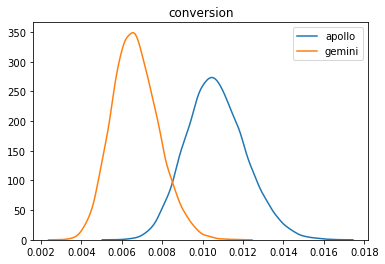

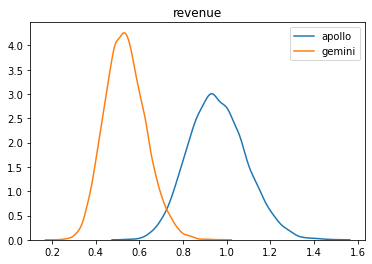

In [11]:
e.result.plot()

In [12]:
e.result.decision()

,Variant,Measure,ProbabilityToBeBest,ProbabilityToBeatBaseline,UpliftFromBaseline,PotentialLossFromBaseline,MaxUplift,MaxPotentialLoss
0,apollo,revenue,0.99645,0.0,0.0,0.0,79.114487,0.030371


Based on the primary measure defined for this experiment, we would go with the variant 'apollo'.